In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

In [73]:
data_test = pd.read_csv('test.csv')
data_train = pd.read_csv('train.csv')
sample_sub = pd.read_csv('sample_submission2.csv')

In [74]:
data_train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [75]:
data_train['Qualification'].value_counts()
#data_test.shape

First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64

In [76]:
data_test.shape

(16496, 18)

In [77]:
data_train.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not'],
      dtype='object')

In [78]:
data_test.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1
3,YAK/S/00016,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1984,2.5,2009,0,0,52,RIVERS,No,Single,No,No,1
4,YAK/S/00017,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1983,7.5,2014,1,0,69,FCT,Yes,Married,No,No,0


In [79]:
data_test.isnull().sum()

EmployeeNo                               0
Division                                 0
Qualification                          730
Gender                                   0
Channel_of_Recruitment                   0
Trainings_Attended                       0
Year_of_birth                            0
Last_performance_score                   0
Year_of_recruitment                      0
Targets_met                              0
Previous_Award                           0
Training_score_average                   0
State_Of_Origin                          0
Foreign_schooled                         0
Marital_Status                           0
Past_Disciplinary_Action                 0
Previous_IntraDepartmental_Movement      0
No_of_previous_employers                 0
dtype: int64

In [80]:
data_train.isnull().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [81]:
cat_col = data_train.select_dtypes(exclude=['int64','float64']).columns
cat_col  = list(cat_col)
cat_col


cat_col = data_test.select_dtypes(exclude=['int64','float64']).columns
cat_col  = list(cat_col)
cat_col


['EmployeeNo',
 'Division',
 'Qualification',
 'Gender',
 'Channel_of_Recruitment',
 'State_Of_Origin',
 'Foreign_schooled',
 'Marital_Status',
 'Past_Disciplinary_Action',
 'Previous_IntraDepartmental_Movement',
 'No_of_previous_employers']

In [82]:
for col in cat_col:
    print("Value count for {}".format(col))
    print(data_train[col].nunique())
    print("___"*20)
    
for col in cat_col:
    print("Value count for {}".format(col))
    print(data_test[col].nunique())
    print("___"*20)
    
    

Value count for EmployeeNo
38312
____________________________________________________________
Value count for Division
9
____________________________________________________________
Value count for Qualification
3
____________________________________________________________
Value count for Gender
2
____________________________________________________________
Value count for Channel_of_Recruitment
3
____________________________________________________________
Value count for State_Of_Origin
37
____________________________________________________________
Value count for Foreign_schooled
2
____________________________________________________________
Value count for Marital_Status
3
____________________________________________________________
Value count for Past_Disciplinary_Action
2
____________________________________________________________
Value count for Previous_IntraDepartmental_Movement
2
____________________________________________________________
Value count for No_of_previous_e

In [83]:
data_train['State_Of_Origin'].value_counts()

LAGOS          6204
FCT            2389
OGUN           2302
RIVERS         2222
ANAMBRA        1710
KANO           1649
DELTA          1594
OYO            1508
KADUNA         1399
IMO            1307
EDO            1259
ENUGU          1025
ABIA            950
OSUN            929
ONDO            875
NIGER           857
KWARA           765
PLATEAU         739
AKWA IBOM       673
NASSARAWA       632
KATSINA         615
ADAMAWA         605
BENUE           579
BAUCHI          557
KOGI            542
SOKOTO          499
CROSS RIVER     495
EKITI           455
BORNO           447
TARABA          400
KEBBI           393
BAYELSA         324
EBONYI          313
GOMBE           291
ZAMFARA         290
JIGAWA          262
YOBE            257
Name: State_Of_Origin, dtype: int64

In [84]:
data_train.drop(columns=['EmployeeNo'], axis=1, inplace=True)
data_test.drop(columns=['EmployeeNo',], axis=1, inplace=True)


In [85]:
data_train.head()

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [86]:
data_train.get_dtype_counts()

object     10
int64       7
float64     1
dtype: int64

In [87]:
data_train.describe()
data_test.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average
count,16496.000000,16496.000000,16496.000000,16496.000000,16496.000000,16496.000000,16496.000000
mean,2.251455,1986.161130,7.692016,2013.122393,0.349600,0.023218,55.433863
std,0.608865,7.708188,3.734303,4.273649,0.476858,0.150599,13.392306
min,2.000000,1958.000000,0.000000,1986.000000,0.000000,0.000000,31.000000
25%,2.000000,1982.000000,5.000000,2011.000000,0.000000,0.000000,43.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000


In [88]:
num_cols = data_train.select_dtypes(exclude=['object']).columns
num_cols = list(num_cols)
num_cols

num_cols = data_test.select_dtypes(exclude=['object']).columns
num_cols = list(num_cols)
num_cols

['Trainings_Attended',
 'Year_of_birth',
 'Last_performance_score',
 'Year_of_recruitment',
 'Targets_met',
 'Previous_Award',
 'Training_score_average']

In [89]:
data_train['Previous_Award'].value_counts()

0    37425
1      887
Name: Previous_Award, dtype: int64

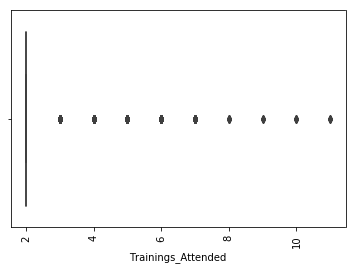

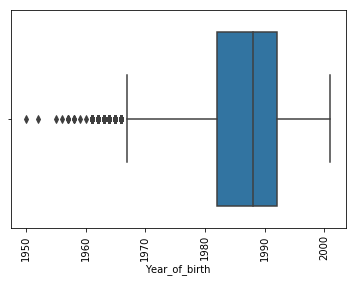

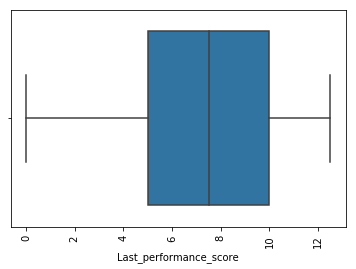

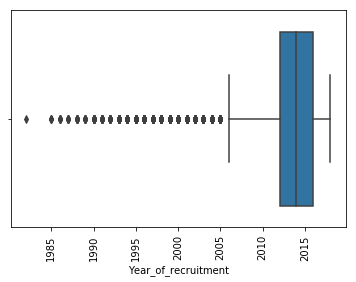

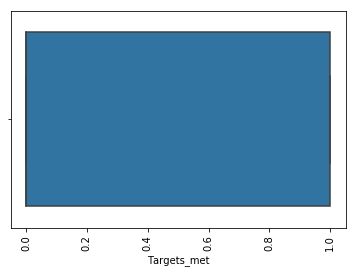

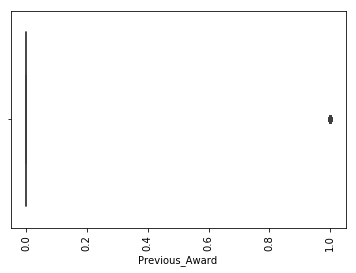

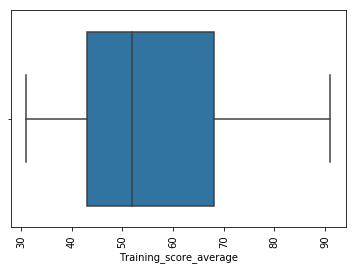

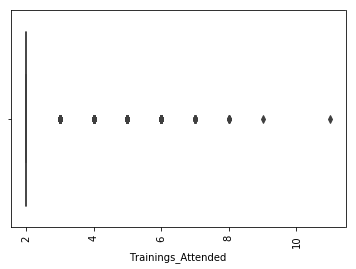

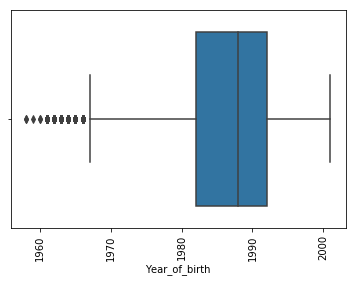

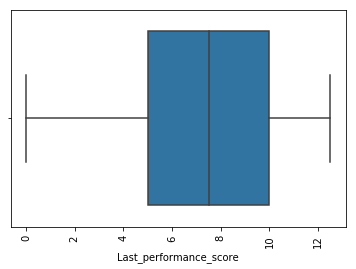

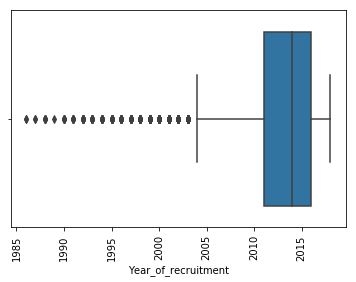

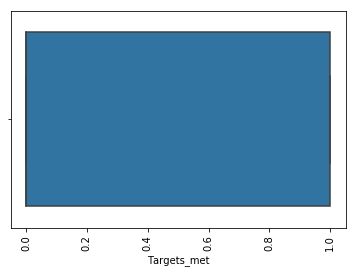

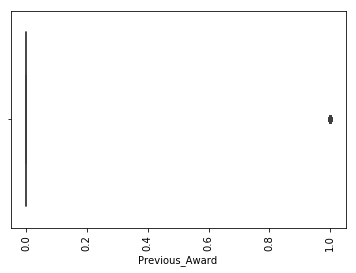

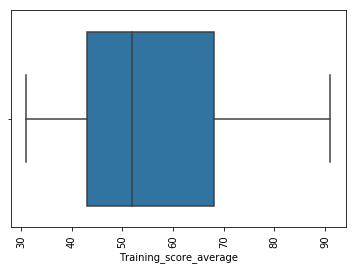

In [90]:
# find no. of pages outliers
for num in num_cols:
    fig = plt.figure()
    axis = fig.gca()
    sns.boxplot(data_train[num], ax=axis)
    plt.xticks(rotation=90)
for num in num_cols:
    fig = plt.figure()
    axis = fig.gca()
    sns.boxplot(data_test[num], ax=axis)
    plt.xticks(rotation=90)

In [91]:
data_train['Promoted_or_Not'].value_counts()

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

In [92]:
data_train['Trainings_Attended'].value_counts()

2     30981
3      5631
4      1244
5       316
6        93
7        28
8         6
10        5
11        4
9         4
Name: Trainings_Attended, dtype: int64

In [93]:
# remove outliers
data_train = data_train.drop(data_train.index[data_train['Year_of_birth'] <= 1972])
data_train = data_train.drop(data_train.index[data_train['Year_of_recruitment'] < 2006])
data_train = data_train.drop(data_train.index[data_train['Trainings_Attended'] > 2])
data_train = data_train.drop(data_train.index[data_train['Previous_Award'] > 0])


# remove outliers
data_test = data_test.drop(data_test.index[data_test['Year_of_birth'] <= 1972])
data_test = data_test.drop(data_test.index[data_test['Year_of_recruitment'] < 2006])
data_test = data_test.drop(data_test.index[data_test['Trainings_Attended'] > 2])
data_test = data_test.drop(data_test.index[data_test['Previous_Award'] > 0])




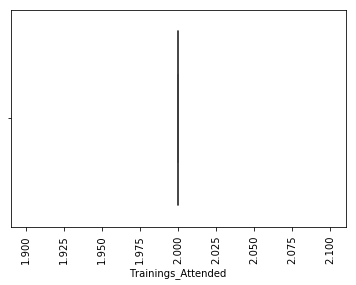

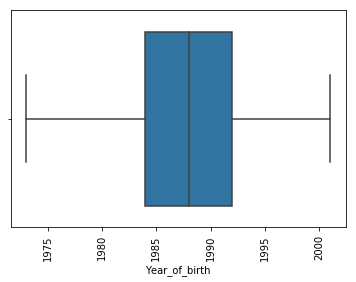

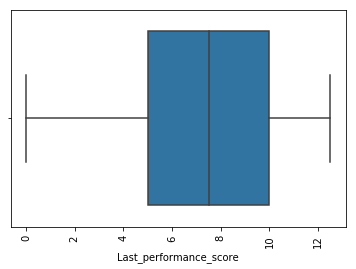

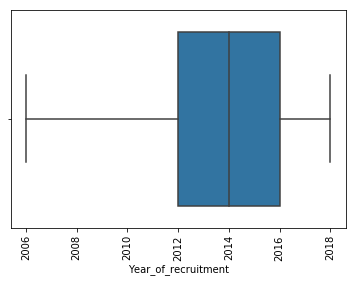

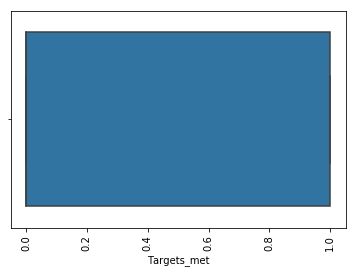

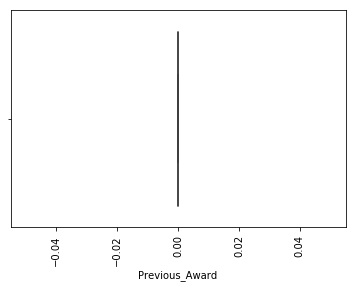

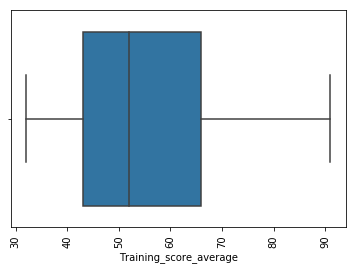

In [94]:
for num in num_cols:
    fig = plt.figure()
    axis = fig.gca()
    sns.boxplot(data_train[num], ax=axis)
    plt.xticks(rotation=90)

In [95]:
print("Number of people  having  First degree and HND")
S = data_train[data_train["Qualification"] == "First Degree or HND"].shape[0]
print(S)

print("Number of people  having MSc, MBA and PhD")
C = data_train[data_train["Qualification"] == "MSc, MBA and PhD"].shape[0]
print(C )

print("Number of Non-University Education")
Q = data_train[data_train["Qualification"] == "Non-University Education"].shape[0]
print(Q)

# S has the highest, now lets fill it with S
data_train['Qualification'] = data_train['Qualification'].fillna("First Degree or HND")

print("Number of people  having  First degree and HND")
S = data_test[data_test["Qualification"] == "First Degree or HND"].shape[0]
print(S)

print("Number of people having MSc, MBA and PhD")
C = data_test[data_test["Qualification"] == "MSc, MBA and PhD"].shape[0]
print(C )

print("Number of Non-University Education")
Q = data_test[data_test["Qualification"] == "Non-University Education"].shape[0]
print(Q)

# S has the highest, now lets fill it with S
data_test['Qualification'] = data_test['Qualification'].fillna("First Degree or HND")

Number of people  having  First degree and HND
18298
Number of people  having MSc, MBA and PhD
6848
Number of Non-University Education
466
Number of people  having  First degree and HND
7937
Number of people having MSc, MBA and PhD
2901
Number of Non-University Education
169


In [96]:
# S has the highest, now lets fill it with S
data_train['Qualification'] = data_train['Qualification'].fillna("S")

In [97]:
data_train.isnull().sum()

Division                               0
Qualification                          0
Gender                                 0
Channel_of_Recruitment                 0
Trainings_Attended                     0
Year_of_birth                          0
Last_performance_score                 0
Year_of_recruitment                    0
Targets_met                            0
Previous_Award                         0
Training_score_average                 0
State_Of_Origin                        0
Foreign_schooled                       0
Marital_Status                         0
Past_Disciplinary_Action               0
Previous_IntraDepartmental_Movement    0
No_of_previous_employers               0
Promoted_or_Not                        0
dtype: int64

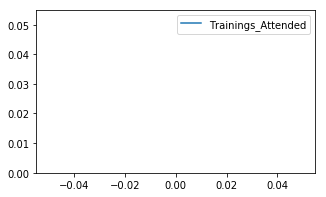

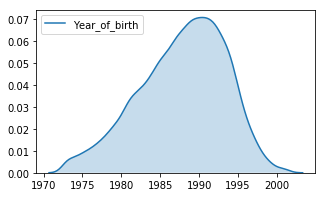

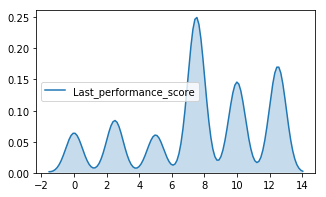

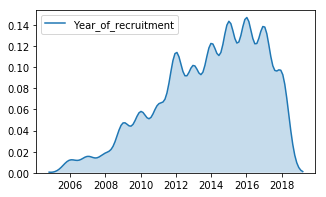

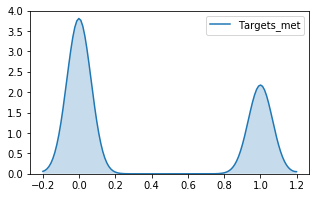

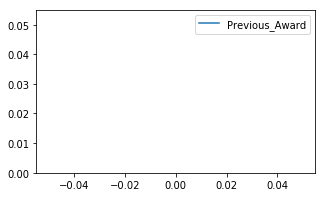

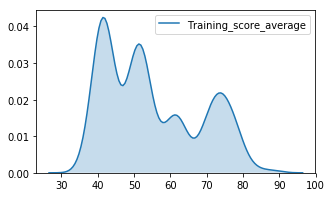

In [98]:
for num in num_cols:
    fig = plt.figure(figsize=(5,3))
    ax = fig.gca()
    sns.kdeplot(data_train[num], ax=ax,shade=True)

In [99]:
data_test.shape

(11605, 17)

In [100]:
cat_col = [n for n in data_train.columns if data_train[n].dtypes == 'object']

cat_to_encode = []
for cat in cat_col:
    temp = len(data_train[cat].unique())
    if temp > 4 :
        cat_to_encode.append(cat)
        
cat_col = [n for n in data_test.columns if data_test[n].dtypes == 'object']

cat_to_encode = []
for cat in cat_col:
    temp = len(data_test[cat].unique())
    if temp > 4 :
        cat_to_encode.append(cat)

In [101]:
cat_col
cat_col

['Division',
 'Qualification',
 'Gender',
 'Channel_of_Recruitment',
 'State_Of_Origin',
 'Foreign_schooled',
 'Marital_Status',
 'Past_Disciplinary_Action',
 'Previous_IntraDepartmental_Movement',
 'No_of_previous_employers']

In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
all_data = pd.concat([data_test, data_train])

In [104]:
lb = LabelEncoder()

for col in cat_col:
    lb.fit(all_data[col])
    all_data[col] = lb.transform(all_data[col])

In [105]:
# remove outliers
#all_data = all_data.drop(all_data.index[all_data['Marital_Status'] > 1.0])
#all_data = all_data.drop(all_data.index[all_data['No_of_previous_employers'] > 2])
#all_data = all_data.drop(all_data.index[all_data['Year_of_recruitment'] < 2008])
#all_data = all_data.drop(all_data.index[all_data['Year_of_birth'] <= 1972])
#all_data = all_data.drop(all_data.index[all_data['Trainings_Attended'] > 2])

In [106]:
all_data.head()

,Channel_of_Recruitment,Division,Foreign_schooled,Gender,Last_performance_score,Marital_Status,No_of_previous_employers,Past_Disciplinary_Action,Previous_Award,Previous_IntraDepartmental_Movement,Promoted_or_Not,Qualification,State_Of_Origin,Targets_met,Training_score_average,Trainings_Attended,Year_of_birth,Year_of_recruitment
0,0,3,1,1,7.5,0,1,0,0,0,NaN,0,14,0,65,2,1976,2017
1,1,3,1,1,0.0,0,1,0,0,0,NaN,0,27,0,69,2,1991,2018
2,1,7,1,1,7.5,0,1,0,0,0,NaN,1,19,0,76,2,1984,2012
3,0,2,0,1,2.5,2,1,0,0,0,NaN,0,32,0,52,2,1984,2009
4,0,3,1,1,7.5,0,0,0,0,0,NaN,0,14,1,69,2,1983,2014


In [107]:
all_data = pd.get_dummies(all_data, columns = ['Qualification','Gender','Channel_of_Recruitment',
                                              'Foreign_schooled','Marital_Status','Past_Disciplinary_Action',
                                              'Previous_IntraDepartmental_Movement'])

In [108]:
all_data.head()

,Division,Last_performance_score,No_of_previous_employers,Previous_Award,Promoted_or_Not,State_Of_Origin,Targets_met,Training_score_average,Trainings_Attended,Year_of_birth,Year_of_recruitment,Qualification_0,Qualification_1,Qualification_2,Gender_0,Gender_1,Channel_of_Recruitment_0,Channel_of_Recruitment_1,Channel_of_Recruitment_2,Foreign_schooled_0,Foreign_schooled_1,Marital_Status_0,Marital_Status_1,Marital_Status_2,Past_Disciplinary_Action_0,Past_Disciplinary_Action_1,Previous_IntraDepartmental_Movement_0,Previous_IntraDepartmental_Movement_1
0,3,7.5,1,0,NaN,14,0,65,2,1976,2017,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0
1,3,0.0,1,0,NaN,27,0,69,2,1991,2018,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0
2,7,7.5,1,0,NaN,19,0,76,2,1984,2012,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0
3,2,2.5,1,0,NaN,32,0,52,2,1984,2009,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,0
4,3,7.5,0,0,NaN,14,1,69,2,1983,2014,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0


In [109]:
data_train = all_data[0:26900]
data_train = all_data[26900:]


In [110]:
X.shape

(16496, 17)

In [111]:
y.shape

(16496, 0)

In [112]:
X = data_test.loc[:, data_test.columns != 'Promoted_or_Not']
y = data_test.loc[:, data_test.columns == 'Promoted_or_Not']

In [113]:
data_test.drop(columns='Promoted_or_Not', inplace=True)

KeyError: "['Promoted_or_Not'] not found in axis"